In [3]:

from torchvision import datasets, transforms
import Args
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas
import threading
import multiprocessing
import data.ff
from HCFedAvg import FileProcess
from HCFedAvg.DataGenerater import *
from torchsummary import summary
import math
import ast

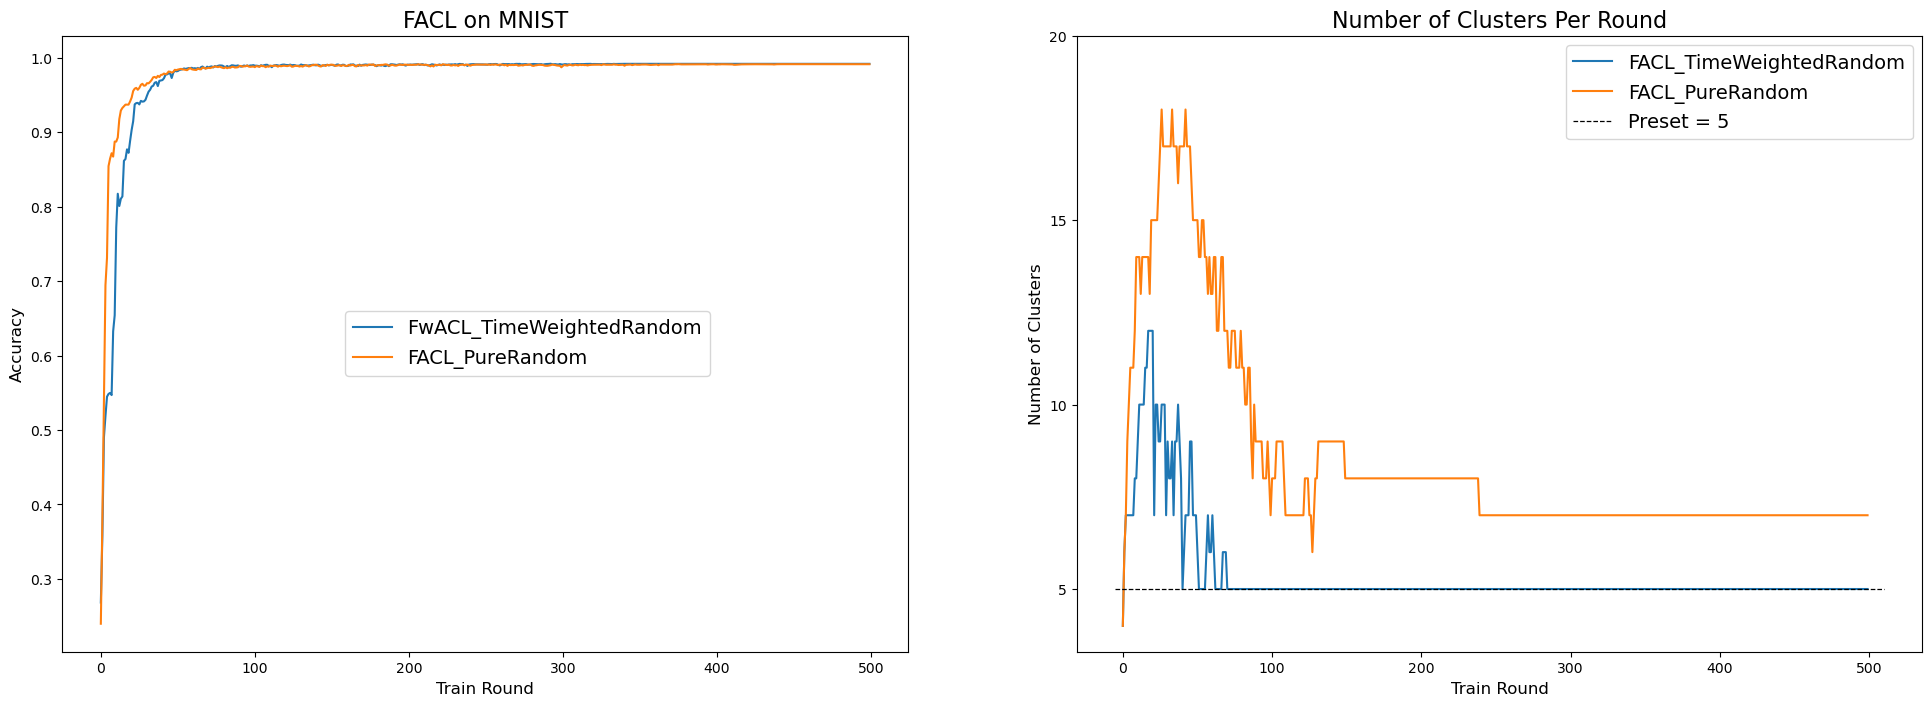

In [24]:
# header_time = FileProcess.read_row_with_file_name(44, "result")
# header_pure = FileProcess.read_row_with_file_name(43, "result")
# 40 39
header_time_1 = FileProcess.read_row_with_file_name(59, "result")
header_pure_1 = FileProcess.read_row_with_file_name(60, "result")


time_acc = ast.literal_eval(header_time_1["acc_list"])
pure_acc = ast.literal_eval(header_pure_1["acc_list"])

time_loss = ast.literal_eval(header_time_1["loss_list"])
pure_loss = ast.literal_eval(header_pure_1["loss_list"])

time_cluster_number = ast.literal_eval(header_time_1["final_cluster_number"])
pure_cluster_number = ast.literal_eval(header_pure_1["final_cluster_number"])

fig = plt.figure(figsize=(24, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(len(time_acc)), time_acc,  label='FwACL_TimeWeightedRandom')
ax1.plot(range(len(pure_acc)), pure_acc,   label='FACL_PureRandom')
ax1.legend(loc= 'center', prop={'size': 14}, bbox_to_anchor=(0.55, 0.5))
ax1.set_xlabel('Train Round', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('FACL on MNIST', fontsize=16)

# ax2 = fig.add_subplot(1, 2, 2)
# pre_set = [5 for i in range(len(pure_cluster_number)+3)]
# ax2.plot(range(len(time_cluster_number)), time_cluster_number,   label='FACL_TimeWeightedRandom')
# ax2.plot(range(len(pure_cluster_number)), pure_cluster_number,   label='FACL_PureRandom')
# ax2.plot(range(-2, len(pure_cluster_number)+1), pre_set,  color='black', label='Preset = 5',linestyle="--",  )
# ax2.legend(loc= 'upper right', prop={'size': 14})
# ax2.set_xlabel('Train Round', fontsize=12)
# ax2.set_ylabel('Number of Clusters', fontsize=12)
# ax2.set_title('Number of Clusters Per Train Round', fontsize=16)


ax2 = fig.add_subplot(1, 2, 2)
pre_set = [5 for i in range(len(pure_cluster_number)+16)]
ax2.plot(range(len(time_cluster_number)), time_cluster_number,   label='FACL_TimeWeightedRandom')
ax2.plot(range(len(pure_cluster_number)), pure_cluster_number,   label='FACL_PureRandom')
ax2.plot(range(-5, len(pure_cluster_number)+11), pre_set,  color='black', label='Preset = 5',linestyle="--", linewidth = 0.9)
ax2.legend(loc= 'upper right', prop={'size': 14})
ax2.set_xlabel('Train Round', fontsize=12)
ax2.set_ylabel('Number of Clusters', fontsize=12)
ax2.set_title('Number of Clusters Per Round', fontsize=16)
ax2.set_yticks(range(5, 21, 5))

plt.show()


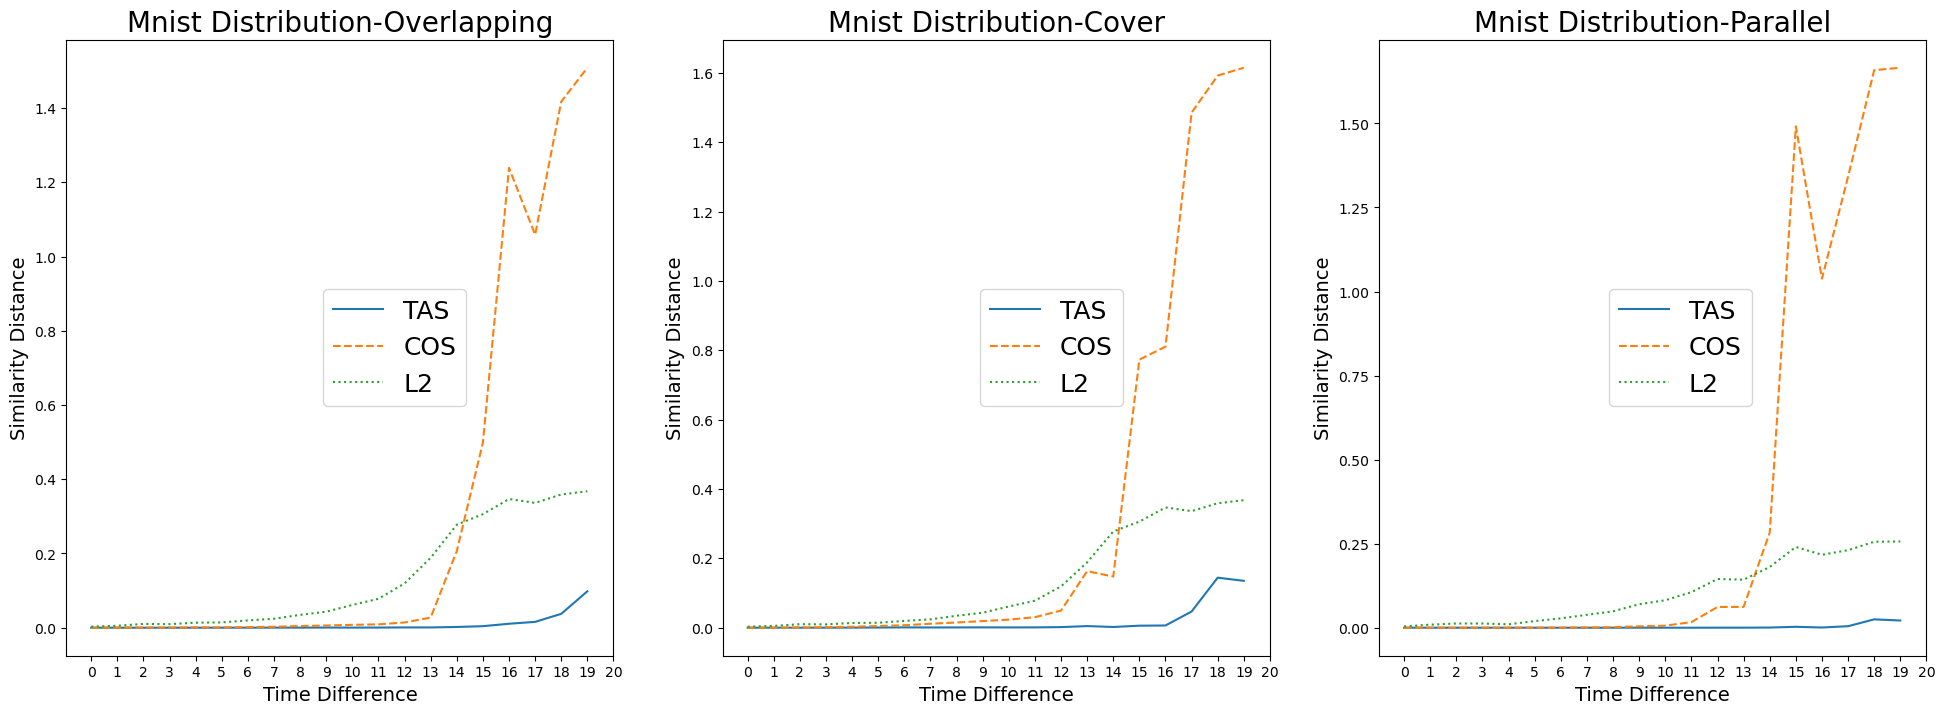

In [18]:


x_ticks = [i for i in range(21)]
x_labels = [str(i) for i in range(21)]


fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(1, 3, 1)
header_1 = FileProcess.read_row_with_file_name(8, "TAS_result")
dis_list_1 = ast.literal_eval(header_1["TAS"])
dis_list_2 = ast.literal_eval(header_1["COS"])
dis_list_3 = ast.literal_eval(header_1["L2"])
ax1.plot(range(len(dis_list_1)), dis_list_1, label="TAS", linestyle="-")
ax1.plot(range(len(dis_list_2)), dis_list_2, label="COS", linestyle="--")
ax1.plot(range(len(dis_list_3)), dis_list_3, label="L2", linestyle=":")
ax1.legend(loc= 'center', prop={'size': 18}, bbox_to_anchor=(0.6, 0.5))
ax1.set_xlabel('Time Difference', fontsize=14)
ax1.set_ylabel('Similarity Distance', fontsize=14)
ax1.set_title('Mnist Distribution-Overlapping', fontsize=20)
ax1.set_xticks(x_ticks, x_labels)



ax2 = fig.add_subplot(1, 3, 2)
header_2 = FileProcess.read_row_with_file_name(7, "TAS_result")
dis_list_1_2 = ast.literal_eval(header_2["TAS"])
dis_list_2_2 = ast.literal_eval(header_2["COS"])
dis_list_2_3 = ast.literal_eval(header_1["L2"])
ax2.plot(range(len(dis_list_1_2)), dis_list_1_2, label="TAS")
ax2.plot(range(len(dis_list_2_2)), dis_list_2_2, label="COS", linestyle="--")
ax2.plot(range(len(dis_list_2_3)), dis_list_2_3, label="L2", linestyle=":")
ax2.legend(loc= 'center', prop={'size': 18}, bbox_to_anchor=(0.6, 0.5))
ax2.set_xlabel('Time Difference', fontsize=14)
ax2.set_ylabel('Similarity Distance', fontsize=14)
ax2.set_title('Mnist Distribution-Cover', fontsize=20)
ax2.set_xticks(x_ticks, x_labels)


ax3 = fig.add_subplot(1, 3, 3)
header_3 = FileProcess.read_row_with_file_name(6, "TAS_result")
dis_list_3_1 = ast.literal_eval(header_3["TAS"])
dis_list_3_2 = ast.literal_eval(header_3["COS"])
dis_list_3_3 = ast.literal_eval(header_3["L2"])
ax3.plot(range(len(dis_list_3_1)), dis_list_3_1, label="TAS")
ax3.plot(range(len(dis_list_3_2)), dis_list_3_2, label="COS", linestyle="--")
ax3.plot(range(len(dis_list_3_3)), dis_list_3_3, label="L2", linestyle=":")
ax3.legend(loc= 'center', prop={'size': 18}, bbox_to_anchor=(0.55, 0.5))
ax3.set_xlabel('Time Difference', fontsize=14)
ax3.set_ylabel('Similarity Distance', fontsize=14)
ax3.set_title('Mnist Distribution-Parallel', fontsize=20)
ax3.set_xticks(x_ticks, x_labels)


# plt.xticks(x_ticks, x_labels, fontsize=16)
background_color = 'white'
plt.rcParams.update({'axes.facecolor': background_color})
# plt.xlabel('Time Difference', fontsize=16)
# plt.ylabel('Similarity Distance', fontsize=16)
# plt.title('Cifar10 Distribution-Parallel', fontsize=24)
plt.show()